<a href="https://colab.research.google.com/github/kahiga2244/hello-world/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_05_02_JOSEPH_KAHIGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# PREDICTION OF BANK USERS AND POTENTIAL USERS ACROSS EAST AFRICA

### (Factors that affect banking in East Afica)

### 1. Defining the Question

### a)Specifying the Data Analytic Question

 To figure out how we can predict which individuals are most likely to have or use a bank account putting into consideration of other factors

b)Defining the Metric for Success

perform univariate analysis using the dataset provided the perfom the bivariate and multivatiate analysis using the same dataset

c)Understanding the context

how will the banks increase the number of bank users by improving  the access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth

d) Recording the Experimental Design


e) Data Relevance

The dataset given contains records from 2016 to 2018 across East Africa on the bank users containing country,	year,	uniqueid,	Has a Bank account,	Type of Location,	Cell Phone Access,	household_size,	Respondent Age,	gender_of_respondent,	The relationship with head,	marital_status,	Level of Educuation and	Type of Job.

# 2. Reading the Data

In [0]:
#importing the libraries that i will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the Data from the source 
 df = pd.read_csv('http://bit.ly/FinancialDataset')
 df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(5)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#filling missing values
df.fillna(0)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [0]:
#description of data
df.describe()

,year,household_size,respondent_age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [0]:
#describing the including categorical data
df.describe(include='all')

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_702,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [0]:
# Previewing the top of our dataset
df.head(5)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [27]:
#renaming a column
df.rename(columns={'The relathip with head':'The relationship with head'}, inplace=True) 
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,NaN,2018,uniqueid_1,NaN,NaN,NaN,3.0,24.0,NaN,Spouse,Married/Living together,Secondary education,Self employed
1,NaN,2018,uniqueid_2,NaN,NaN,NaN,5.0,70.0,NaN,Head of Household,Widowed,No formal education,Government Dependent
2,NaN,2018,uniqueid_3,NaN,NaN,NaN,5.0,26.0,NaN,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,NaN,2018,uniqueid_4,NaN,NaN,NaN,5.0,34.0,NaN,Head of Household,Married/Living together,Primary education,Formally employed Private
4,NaN,2018,uniqueid_5,NaN,NaN,NaN,8.0,26.0,NaN,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
has_a_bank_account         object
type_of_location           object
cell_phone_access          object
household_size            float64
respondent_age            float64
gender_of_respondent       object
the_relathip_with_head     object
marital_status             object
level_of_educuation        object
type_of_job                object
dtype: object

#  univariate analysis

categorical elements

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


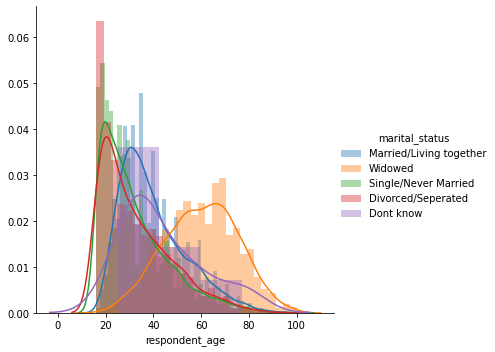

In [0]:
#comparing using marital status
sns.FacetGrid(df, hue="marital_status", size =5).map(sns.distplot, "respondent_age").add_legend()

from the above the people that are most likely to use the bank are between ages 20_ 40 and not neccesarily married

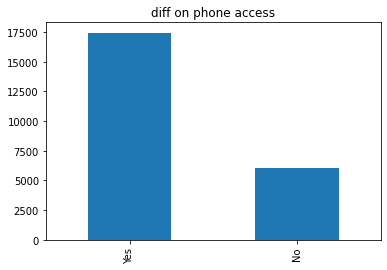

In [0]:
df['cell_phone_access'].value_counts().plot.bar(title='diff on phone access')

most of the people had access to cell phones

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


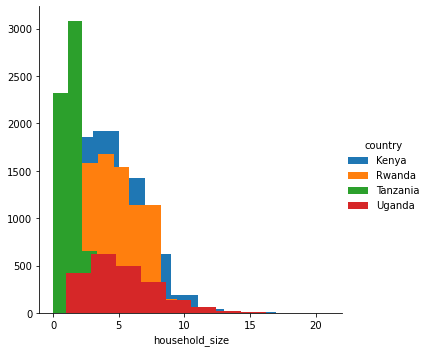

In [0]:
sns.FacetGrid(df, hue="country", size =5).map(plt.hist, "household_size").add_legend()

Rwanda leads with household_size while kenya is the least with access 

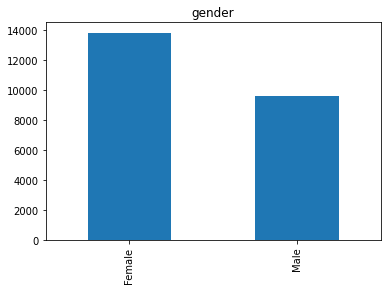

In [0]:
df['gender_of_respondent'].value_counts().plot.bar(title='gender')

most of the respondents were female

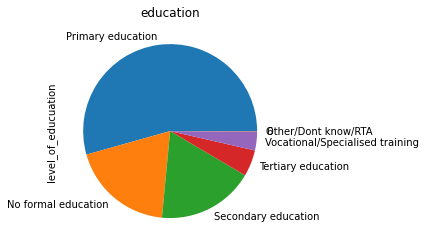

In [0]:
df['level_of_educuation'].value_counts().plot.pie(title='education')

according to our data set most people have received primary education

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


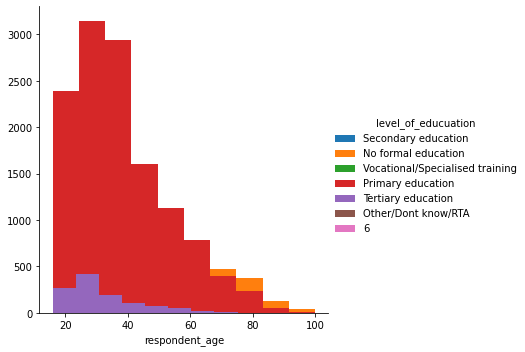

In [0]:
sns.FacetGrid(df, hue="level_of_educuation", size =5).map(plt.hist, "respondent_age").add_legend()

most people have received the basic education

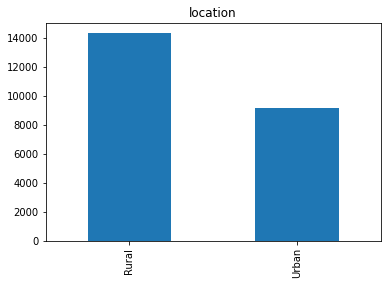

In [0]:
df['Type of Location'].value_counts().plot.bar(title='location')

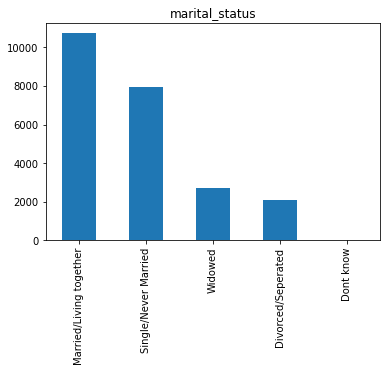

In [0]:
df['marital_status'].value_counts().plot.bar(title='marital_status')

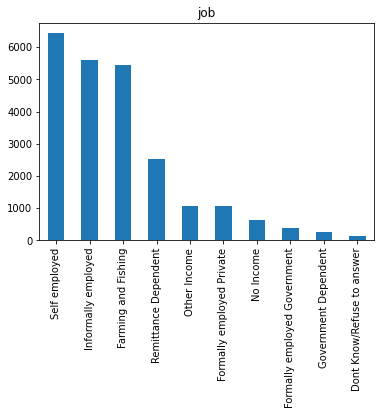

In [0]:
df['type of job'].value_counts().plot.bar(title='job')

most are self employed

In [0]:
numeric variables

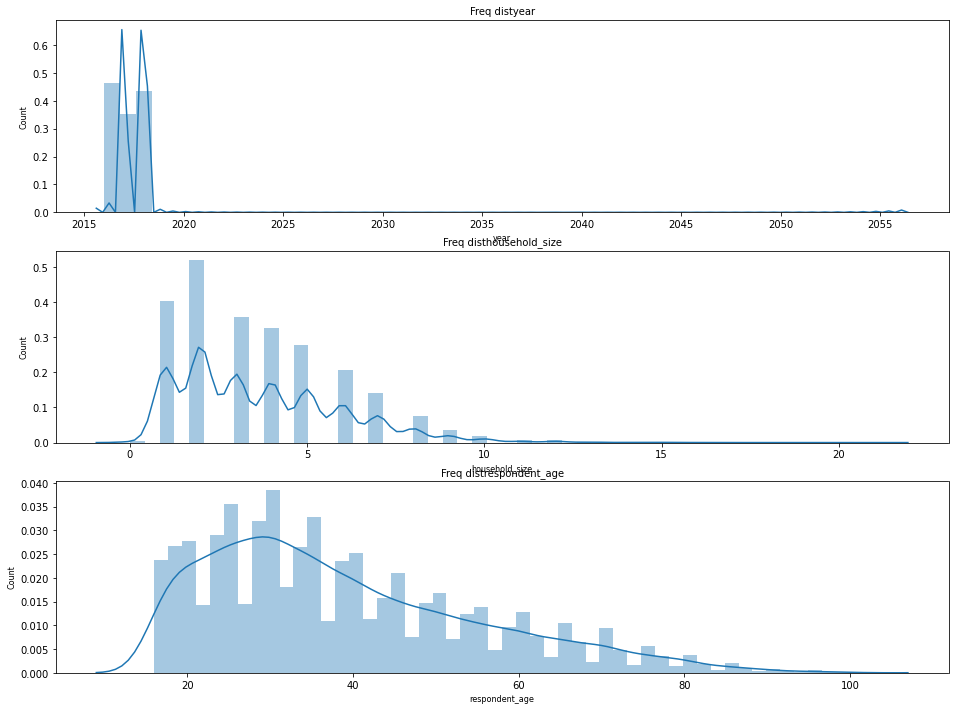

In [0]:
#list the columns 
col_names  = ['year', 'household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i,col_val in enumerate(col_names):
  sns.distplot(df[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Freq dist'+col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize=8)

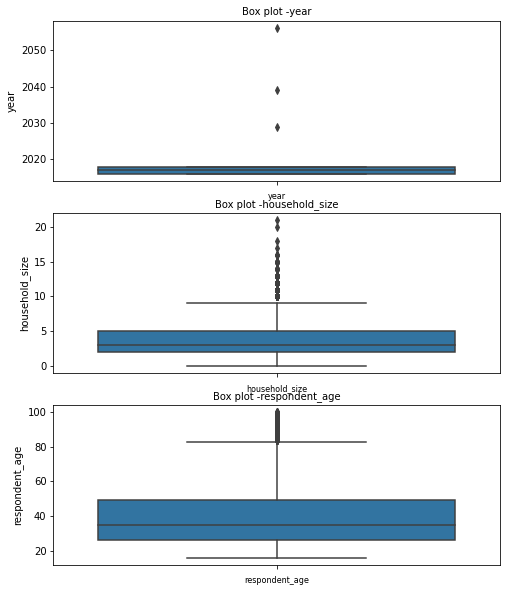

In [0]:
# Checking for Outliers
col_names = ['year', 'household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot -'+ col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


In [0]:
# Identifying the Missing Data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [0]:
# Dealing with the Missing Data
df= df.dropna()
df
#CLEANING
df = df.dropna(how='all')
df
#REPLACE WITH ZERO
df.fillna(0)
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

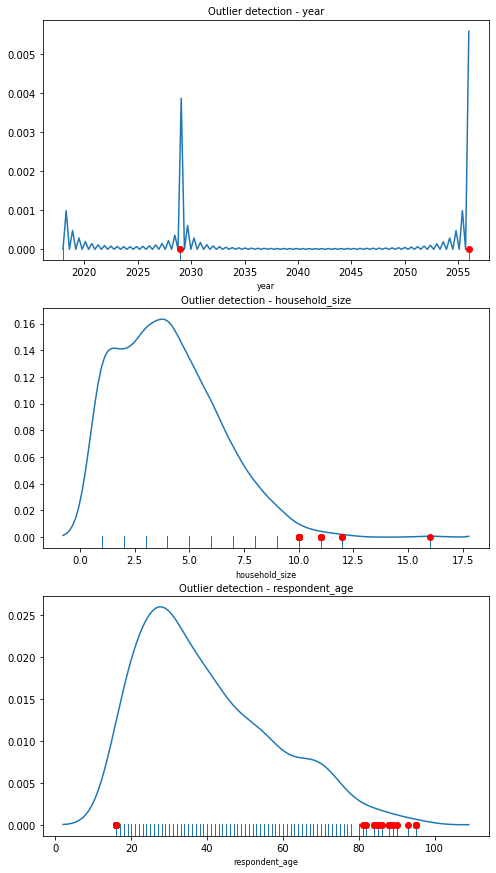

In [0]:
#univariate outlier treatment
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['year','household_size','respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):
    x = df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()


# Bivariate

In [0]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

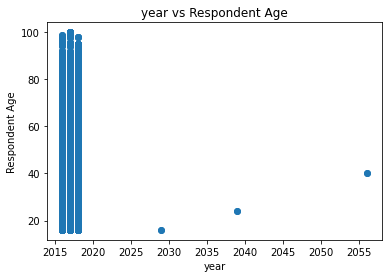

In [0]:

# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'year', y = 'respondent_age', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df["year"] , df["respondent_age"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = df["year"], y = df["respondent_age"], fit_reg=False)

# Giving our scatterplot a title
plt.title('year vs Respondent Age')

# Labelling our x axis
plt.xlabel('year')

# Labelling our y axis
plt.ylabel('Respondent Age')

# We then display our scatterplot as shown below
plt.show()


the highest record was in 2017

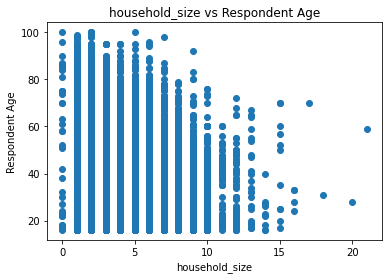

In [0]:
# Plotting our scatterplot
plt.scatter(df['household_size'], df['Respondent Age'])

# Giving our scatterplot a title
plt.title('household_size vs Respondent Age')

# Labelling our x axis
plt.xlabel('household_size')

# Labelling our y axis
plt.ylabel('Respondent Age')

# Displaying our scatterplot
plt.show()

<function matplotlib.pyplot.show>

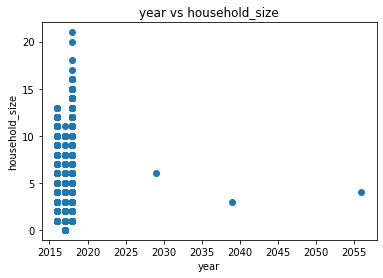

In [0]:
plt.scatter(df['year'],df['household_size'])
#lets put the title
plt.title('year vs household_size')
#labelling the axis
plt.xlabel('year')
plt.ylabel('household_size')
#now we show
plt.show

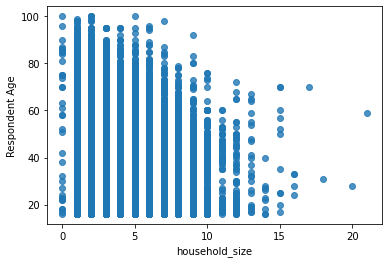

In [0]:
sns.regplot(x= df['household_size'], y= df['Respondent Age'], fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


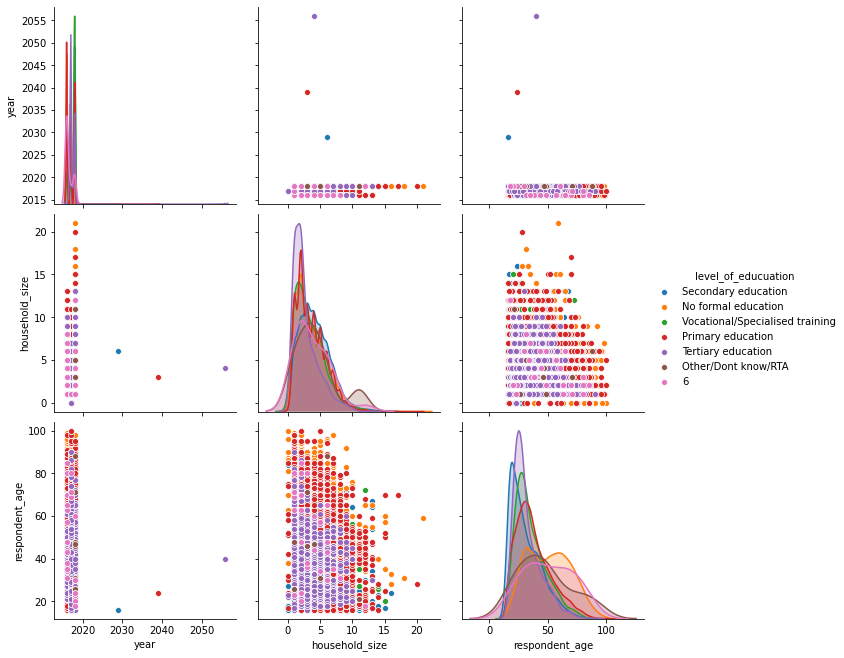

In [0]:
sns.pairplot(df, hue='level_of_educuation', size = 3)
plt.show()

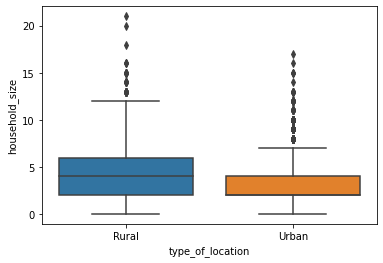

In [0]:
sns.boxplot(x="type_of_location", y="household_size", data=df)
plt.show()

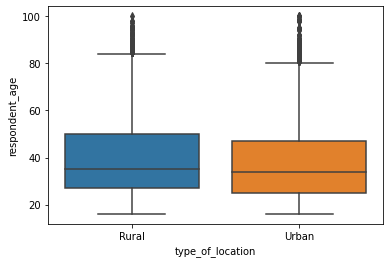

In [0]:
sns.boxplot(x="type_of_location", y="respondent_age", data=df)
plt.show()

# Multivariate 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


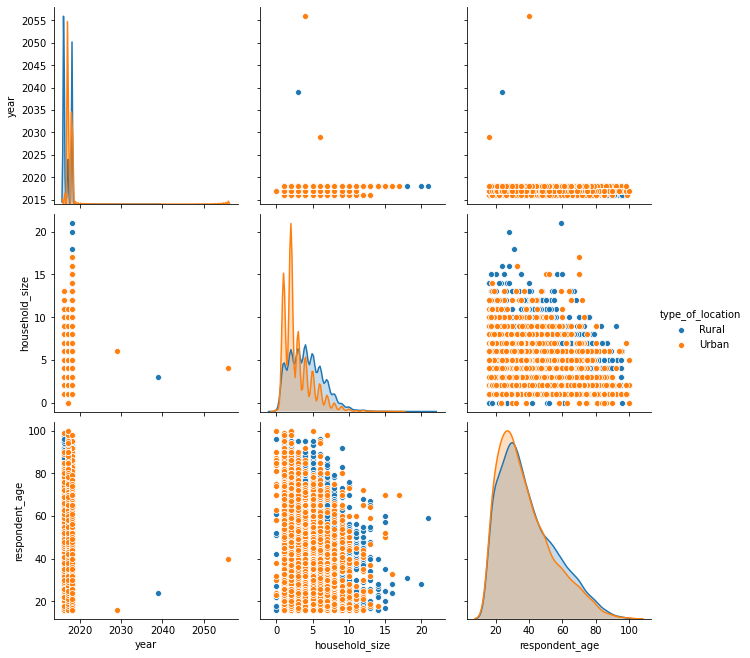

In [0]:
sns.pairplot(df, hue="type_of_location", size=3)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


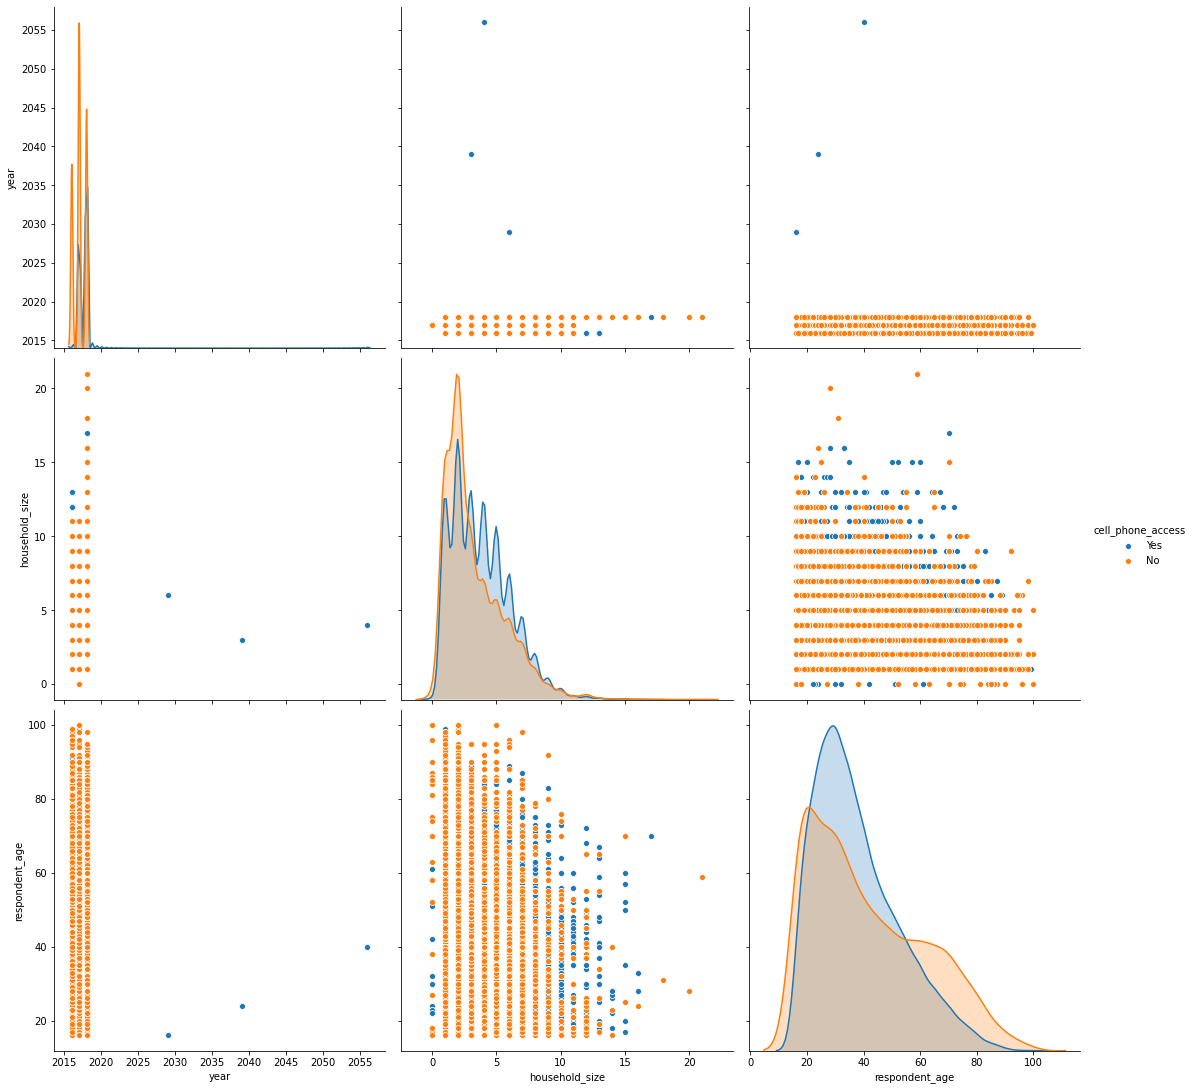

In [0]:
sns.pairplot(df, hue="cell_phone_access", size = 5)
plt.show()

In [25]:
bank = {'Yes': 1, 'No': 0}
location = {"Urban":1, "Rural":0}
cellphone = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}
df['has_a_bank_account'] = df['has_a_bank_account'].map(bank)
df['type_of_location'] = df['type_of_location'].map(location)
df['cell_phone_access'] = df['cell_phone_access'].map(cellphone)
df['gender_of_respondent'] = df['gender_of_respondent'].map(gender)
country = {'Kenya':1,'Uganda':2,'Rwanda':3,'Tanzania':4}
df['country'] = df['country'].map(country)
df['the_relathip_with_head'] = df['the_relathip_with_head'].astype(float)

ValueError: ignored

In [20]:
X = df.drop('uniqueid', 1)
y = df['uniqueid']
#splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
##normalizatiom
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#applying pca
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance
##training our algorithim
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#  Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

ValueError: ignored

# 7. Implementing the Solution

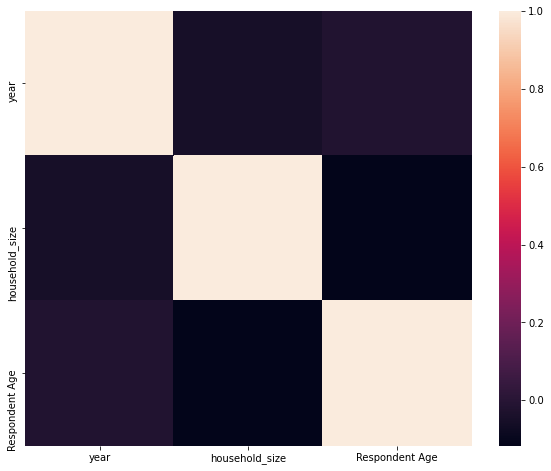

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
#convertion
bank = {'Yes': 1, 'No': 0}
location = {"Urban":1, "Rural":0}
cellphone = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}
df['bank'] = df['Has a Bank account'].map(bank)
df['location'] = df['Type of Location'].map(location)
df['cellphone'] = df['Cell Phone Access'].map(cellphone)
df['gender'] = df['gender_of_respondent'].map(gender)


# 8. Challenging the solution

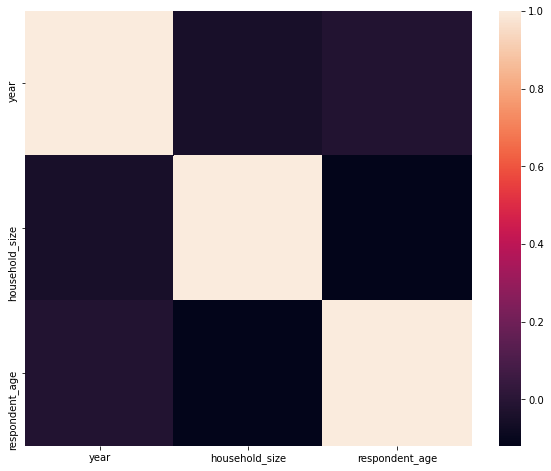

In [0]:
# Reviewing the Solution
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values)

In [0]:
# Calculating the pearson coefficient
pearson_coeff = df["household_size"].corr(df["respondent_age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["household_size"].corr(df["respondent_age"]) 
print(coeff)

-0.11970919507762415
-0.11970919507762415


# 9. Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?